# Exploring Youth Literacy Rates Using World Bank Data


## Section 1: Business Understanding
Literacy is crucial for individuals and countries as a whole. In this post, I will examine three questions related to youth literacy:
### Questions 
1. How has youth literacy changed over time?
2. Which countries have the lowest youth literacy rates?
3. How are youth literacy rates, per capita income, and population related?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


## Section 2: Data Understanding

The data has already been retreived from the World Bank API, cleaned, and stored in csv files.

Data Source: https://data.worldbank.org/

In [2]:
# Read the first dataset from csv file and create a dataframe
pd_lit_cat = pd.read_csv('data/worldbanklit.csv', index_col=0)
pd_lit_cat.head(10)

,country,2000_youth_literacy,2005_youth_literacy,2010_youth_literacy,2015_youth_literacy
XD,High income,NaN,NaN,NaN,NaN
XM,Low income,58.237701,62.743111,64.958107,70.723053
XN,Lower middle income,76.500053,80.286171,83.667610,87.486351
XP,Middle income,87.145592,89.363228,90.830139,92.432930
XT,Upper middle income,97.671638,98.370148,98.450371,98.549370
1W,World,86.574059,88.475258,89.567421,91.030144


In [3]:
# Read the worldbank-lit-inc.csv file.
# Since we only want the countries, not the aggregate groups, we will also read country-list.csv
# and use a right join to keep only countires
df = pd.read_csv('data/worldbank-lit-inc.csv', index_col=0)
df_countries = pd.read_csv('data/country-list.csv', index_col=0)
df_lit_country = df.join(df_countries.drop(columns=['country']), how='right').sort_values('youth_literacy')

print('Countries with missing youth literacy rates: {}'.format(df_lit_country['youth_literacy'].isna().sum()))
print('Countries with missing gnp: {}'.format(df_lit_country['gnp'].isna().sum()))
print('Countries with missing population: {}'.format(df_lit_country['population'].isna().sum()))

print('\nRows: {}, Columns:{}'.format(df_lit_country.shape[0], df_lit_country.shape[1]))
df_lit_country.head()

Countries with missing youth literacy rates: 50
Countries with missing gnp: 12
Countries with missing population: 0

Rows: 217, Columns:7


,country,gnp,gnp_year,youth_literacy,youth_literacy_year,population,population_year
SO,Somalia,130.0,1990.0,13.140000,1972.0,15442905,2019
TD,Chad,700.0,2019.0,30.791611,2016.0,15946876,2019
CF,Central African Republic,520.0,2019.0,38.268650,2018.0,4745185,2019
NE,Niger,600.0,2019.0,43.459999,2018.0,23310715,2019
GN,Guinea,930.0,2019.0,46.295052,2014.0,12771246,2019


## Section 3: Data Preparation
The data has already been retreived from the World Bank API, cleaned, and stored in csv files.

See the data-scripts and data folders in the repository.


In [4]:
# Drop the row with all Nan values(high income aggregate)
pd_lit_cat.dropna(inplace=True)
pd_lit_cat.head()

,country,2000_youth_literacy,2005_youth_literacy,2010_youth_literacy,2015_youth_literacy
XM,Low income,58.237701,62.743111,64.958107,70.723053
XN,Lower middle income,76.500053,80.286171,83.667610,87.486351
XP,Middle income,87.145592,89.363228,90.830139,92.432930
XT,Upper middle income,97.671638,98.370148,98.450371,98.549370
1W,World,86.574059,88.475258,89.567421,91.030144


In [5]:
#Drop the rows with missing literacy rates or gnp
df_lit_country.dropna(inplace=True)
print('Rows: {}, Columns:{}'.format(df_lit_country.shape[0], df_lit_country.shape[1]))

df_lit_country.head()

Rows: 163, Columns:7


,country,gnp,gnp_year,youth_literacy,youth_literacy_year,population,population_year
SO,Somalia,130.0,1990.0,13.140000,1972.0,15442905,2019
TD,Chad,700.0,2019.0,30.791611,2016.0,15946876,2019
CF,Central African Republic,520.0,2019.0,38.268650,2018.0,4745185,2019
NE,Niger,600.0,2019.0,43.459999,2018.0,23310715,2019
GN,Guinea,930.0,2019.0,46.295052,2014.0,12771246,2019


## Section 4: Data Modeling


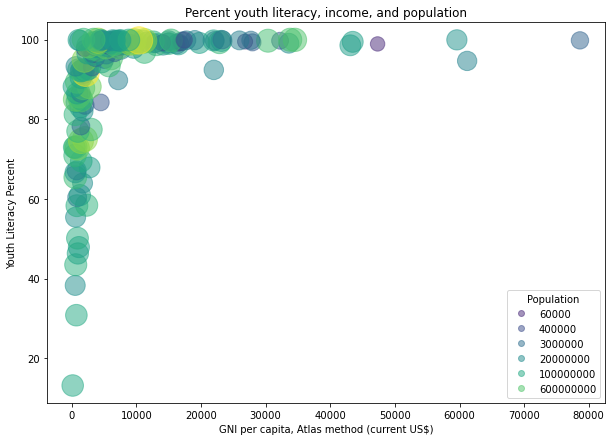

In [6]:
c = np.log10(df_lit_country['population']).to_numpy()
key = [round(round(10**(n/10),-int(np.floor(np.log10(abs(10**(n/10))))))) for n in range(48,92,8)]

plt.rcParams["figure.figsize"] = (10,7)
scatter = plt.scatter(df_lit_country['gnp'],df_lit_country['youth_literacy'], s=(3*c)**2, c=c/10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=key,loc="lower right", title="Population")
plt.title('Percent youth literacy, income, and population')
plt.xlabel('GNI per capita, Atlas method (current US$)')
plt.ylabel('Youth Literacy Percent')
plt.show();

#### Supervised regression models: one x-variable, gnp
1. Linear
2. Natural logarithm
3. Exponential
4. Decision tree

In [7]:
#Regression one variable
X = np.array(df_lit_country['gnp']).reshape(-1, 1)
y = df_lit_country['youth_literacy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression() 

print('One variable: gnp')
lm_model.fit(X_train, y_train)
print('Linear: Train score: {}, Test score: {}'.format(lm_model.score(X_train,y_train),lm_model.score(X_test,y_test)))

lm_model.fit(np.log(X_train), y_train)
print('Log: Train score: {}, Test score: {}'.format(
    lm_model.score(np.log(X_train),y_train),lm_model.score(np.log(X_test),y_test)))

lm_model.fit(X_train, np.log(y_train))
print('Exp: Train score: {}, Test score: {}'.format(
    lm_model.score(X_train,np.log(y_train)),lm_model.score(X_test,np.log(y_test))))

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)
print('Decision Tree: Train score: {}, Test score: {}'.format(regr.score(X_train,y_train),regr.score(X_test,y_test)))

One variable: gnp
Linear: Train score: 0.11816625147319337, Test score: 0.16209468586935838
Log: Train score: 0.48072210654403813, Test score: 0.4113098767853651
Exp: Train score: 0.08167645037316584, Test score: 0.12715501192775092
Decision Tree: Train score: 0.7339831482606674, Test score: 0.31412954960902006


#### Supervised regression models: two x-variables, gnp and population
1. Linear
2. Natural logarithm
3. Exponential
4. Decision tree

In [8]:
# Two variable regression
X2 = df_lit_country.loc[:, ['gnp','population']]
y2 = df_lit_country['youth_literacy']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state=42)

print('Two variable: gnp and population')
lm_model = LinearRegression() 

lm_model.fit(X2_train, y2_train)
print('Linear: Train score: {}, Test score: {}'.format(lm_model.score(X2_train,y2_train),lm_model.score(X2_test,y2_test)))

lm_model.fit(np.log(X2_train), y2_train)
print('Log: Train score: {}, Test score: {}'.format(
    lm_model.score(np.log(X2_train),y2_train),lm_model.score(np.log(X2_test),y2_test)))

lm_model.fit(X2_train, np.log(y2_train))
print('Exp: Train score: {}, Test score: {}'.format(
    lm_model.score(X2_train,np.log(y2_train)),lm_model.score(X2_test,np.log(y2_test))))

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X2_train, y2_train)
print('Decision Tree: Train score: {}, Test score: {}'.format(regr.score(X2_train,y2_train),regr.score(X2_test,y2_test)))


Two variable: gnp and population
Linear: Train score: 0.1225495722615686, Test score: 0.1597411097744892
Log: Train score: 0.4822730186275057, Test score: 0.40801807955978886
Exp: Train score: 0.08565580242421222, Test score: 0.12330241723290036
Decision Tree: Train score: 0.7339831482606674, Test score: 0.31412954960902006


In [9]:
# Equation for best model
lm_model.fit(np.log(X_train), y_train)
print('y = {} * log(x1) + {}'.format(lm_model.coef_[0],lm_model.intercept_))

y = 8.56394311610811 * log(x1) + 18.437000414628585


The scores did not change when adding the population variable. The best model of those tested is logarithmic.

The equation is: y = 8.563943116108106 * log(x) + 18.437000414628613 where x is GNP.

In [10]:
# Calculate score using entire dataset
print('Score: {}'.format(lm_model.score(np.log(X),y)))

Score: 0.4642352744026199


#### Checking for outliers
Next I checked for and removed countries who had a GNP that would qualify as an outler using the IQR mehtod.

In [11]:
#Find gnp outliers
var = 'gnp'
Q1 = df_lit_country[var].quantile(0.25)
Q3 = df_lit_country[var].quantile(0.75)
IQR = Q3 - Q1
print('Q1:{}, Q3:{}, IQR:{}, Lower bound: {}, Upper bound:{}'.format(Q1,Q3,IQR,Q1-1.5*IQR,Q3+1.5*IQR))
lower = Q1 - 1.5*IQR
upper = Q3+1.5*IQR
print('Outliers: {}'.format(
    df_lit_country[df_lit_country[var]<lower][var].count() + df_lit_country[df_lit_country[var]>upper][var].count()))

Q1:1690.0, Q3:11245.0, IQR:9555.0, Lower bound: -12642.5, Upper bound:25577.5
Outliers: 15


In [12]:
#Filter outliers
df_filtered = df_lit_country[df_lit_country['gnp']<=upper]

#### Supervised regression models with outliers removed
1. Linear
2. Natural logarithm
3. Exponential
4. Decision tree

In [13]:
#Linear regression one variable
X = np.array(df_filtered['gnp']).reshape(-1, 1)
y = df_filtered['youth_literacy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

print('One variable: gnp; Outliers removed')
lm_model.fit(X_train, y_train)
print('Linear: Train score: {}, Test score: {}'.format(lm_model.score(X_train,y_train),lm_model.score(X_test,y_test)))

lm_model.fit(np.log(X_train), y_train)
print('Log: Train score: {}, Test score: {}'.format(
    lm_model.score(np.log(X_train),y_train),lm_model.score(np.log(X_test),y_test)))

lm_model.fit(X_train, np.log(y_train))
print('Exp: Train score: {}, Test score: {}'.format(
    lm_model.score(X_train,np.log(y_train)),lm_model.score(X_test,np.log(y_test))))

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)
print('Decision Tree: Train score: {}, Test score: {}'.format(regr.score(X_train,y_train),regr.score(X_test,y_test)))

One variable: gnp; Outliers removed
Linear: Train score: 0.21256104854896174, Test score: 0.29741469037615587
Log: Train score: 0.5107511987248843, Test score: 0.48131952153456503
Exp: Train score: 0.14588281113014168, Test score: 0.26668290761071267
Decision Tree: Train score: 0.7129838466717415, Test score: 0.4063496625684241


The best model of those tested is logarithmic with outliers removed.

In [14]:
lm_model.fit(np.log(X_train), y_train)
print('y = {} * log(x1) + {}'.format(lm_model.coef_[0],lm_model.intercept_))

y = 10.05465505694591 * log(x1) + 7.547681706282617


In [15]:
# Calculate score using entire dataset
print('Score: {}'.format(lm_model.score(np.log(X),y)))

Score: 0.5039693097952622


## Section 5: Evaluate the Results

### Question 1
### How has youth literacy changed over time?

Here we have % youth literacy (ages 15-24) for years 2000, 2005, 2010, and 2015 aggregated by income group.
You can learn more about the country income groups here:

https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

Youth literacy rates were unavailable for the high income group.

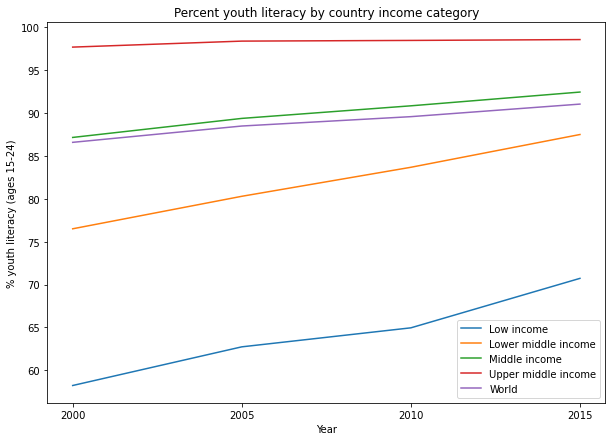

In [16]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(['2000','2005','2010','2015'], pd_lit_cat.iloc[:,1:].transpose())
plt.legend(pd_lit_cat['country'], loc='lower right')
plt.title('Percent youth literacy by country income category')
plt.xlabel('Year')
plt.ylabel('% youth literacy (ages 15-24)')
plt.show();

We see that literacy rates have increased over this time period for all income groups. The low income group had the most dramatic increase but that group is still far behind the other groups.

### Question 2
### Which countries have the lowest youth literacy rates?

In [17]:
df_lit_country.head(25)

,country,gnp,gnp_year,youth_literacy,youth_literacy_year,population,population_year
SO,Somalia,130.0,1990.0,13.140000,1972.0,15442905,2019
TD,Chad,700.0,2019.0,30.791611,2016.0,15946876,2019
CF,Central African Republic,520.0,2019.0,38.268650,2018.0,4745185,2019
NE,Niger,600.0,2019.0,43.459999,2018.0,23310715,2019
GN,Guinea,930.0,2019.0,46.295052,2014.0,12771246,2019
SS,South Sudan,1090.0,2015.0,47.900959,2018.0,11062113,2019
ML,Mali,870.0,2019.0,50.134701,2018.0,19658031,2019
LR,Liberia,580.0,2019.0,55.398701,2017.0,4937374,2019
BF,Burkina Faso,780.0,2019.0,58.290001,2018.0,20321378,2019
CI,Cote d'Ivoire,2290.0,2019.0,58.420151,2018.0,25716544,2019


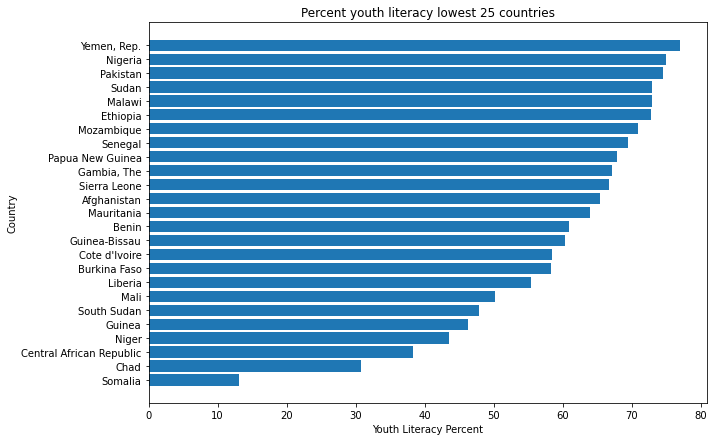

In [18]:
max_countries = 25
plt.barh(df_lit_country['country'].head(max_countries),df_lit_country['youth_literacy'].head(max_countries))
plt.title('Percent youth literacy lowest 25 countries')
plt.xlabel('Youth Literacy Percent')
plt.ylabel('Country')
plt.show()

We see that Somalia has the lowest literacy rate in this dataset but the most recent figure available for this indicator was from 1972. It is likely to be out of date.

The remaining countries in this query range from a low of about 31% to a high of 77%.
There are 50 countries for which no youth literacy data is available.

### Question 3
### How are youth literacy rates, per capita income, and population related?


Income is measured as GNI converted to current U.S. dollars.

You can read more about GNI here:

https://datahelpdesk.worldbank.org/knowledgebase/articles/77933-what-is-the-world-bank-atlas-method

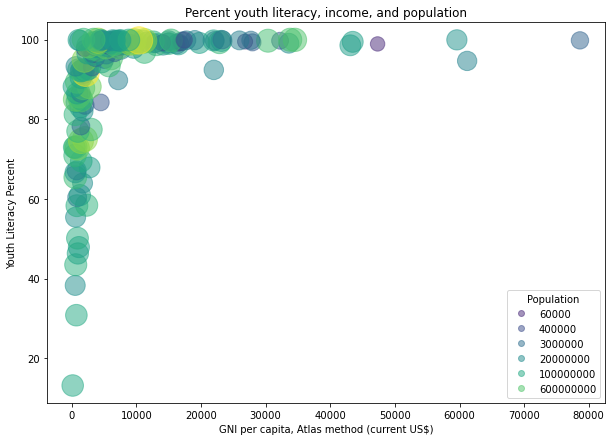

In [19]:
c = np.log10(df_lit_country['population']).to_numpy()
key = [round(round(10**(n/10),-int(np.floor(np.log10(abs(10**(n/10))))))) for n in range(48,92,8)]

plt.rcParams["figure.figsize"] = (10,7)
scatter = plt.scatter(df_lit_country['gnp'],df_lit_country['youth_literacy'], s=(3*c)**2, c=c/10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=key,loc="lower right", title="Population")
plt.title('Percent youth literacy, income, and population')
plt.xlabel('GNI per capita, Atlas method (current US$)')
plt.ylabel('Youth Literacy Percent')
plt.show();

We can see from the scatterplot that there appears to be a relationship between income and youth literacy rate. All of the countries with low youth literacy rates also have low income. The relationship is not clear for the countries with high youth literacy rates. It is hard to tell from the graph if population is related to youth literacy rates. The model did not improve when adding the population variable to the model.

In [20]:
# Countries under literacy rate percentages
percents = range(50,100,10)
for n in percents:
    print('Under {}%, {} countries'.format(n,df_lit_country[df_lit_country['youth_literacy']<n]['youth_literacy'].count()))
print('Out of {} countries'.format(df_lit_country.shape[0]))

Under 50%, 6 countries
Under 60%, 10 countries
Under 70%, 18 countries
Under 80%, 27 countries
Under 90%, 44 countries
Out of 163 countries


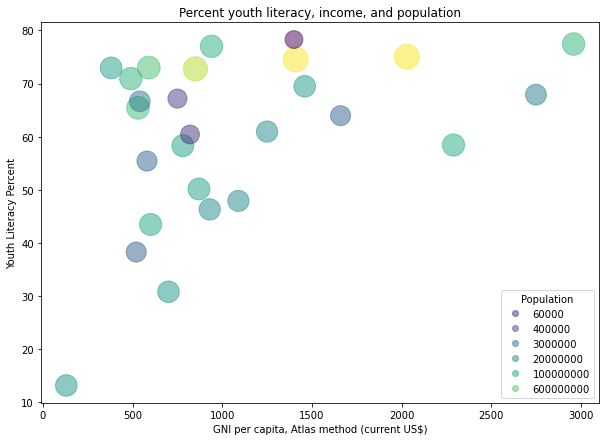

In [21]:
# Scatter plot of counties under 80%
max_countries = 27
df_low_lit = df_lit_country.head(max_countries)
c2 = np.log10(df_low_lit['population']).to_numpy()

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(df_low_lit['gnp'],df_low_lit['youth_literacy'], s=(3*c2)**2, c=c2/10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=key,loc="lower right", title="Population")
plt.title('Percent youth literacy, income, and population')
plt.xlabel('GNI per capita, Atlas method (current US$)')
plt.ylabel('Youth Literacy Percent')
plt.show();


In [22]:
print('Median GNI for countries under 80% youth literacy: {} USD'.format(df_low_lit['gnp'].median()))
print('Maximum GNI for countries under 80% youth literacy: {} USD'.format(df_low_lit['gnp'].max()))
print('Median GNI for all countries in the dataset: {} USD'.format(df_lit_country['gnp'].median()))

Median GNI for countries under 80% youth literacy: 850.0 USD
Maximum GNI for countries under 80% youth literacy: 2960.0 USD
Median GNI for all countries in the dataset: 4780.0 USD


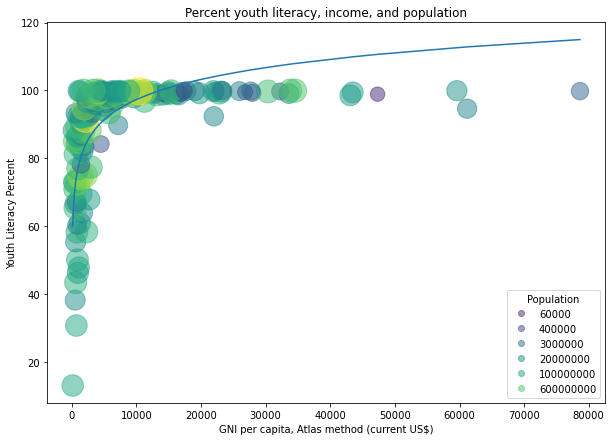

In [23]:
#scatter plot with equation
plt.rcParams["figure.figsize"] = (10,7)

df = df_lit_country.sort_values('gnp')

scatter = plt.scatter(df_lit_country['gnp'],df_lit_country['youth_literacy'], s=(3*c)**2, c=c/10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=key,loc="lower right", title="Population")
plt.title('Percent youth literacy, income, and population')
plt.xlabel('GNI per capita, Atlas method (current US$)')
plt.ylabel('Youth Literacy Percent')

plt.plot(df['gnp'], 8.563943116108106 * np.log(df['gnp']) + 18.437000414628613)
plt.show();

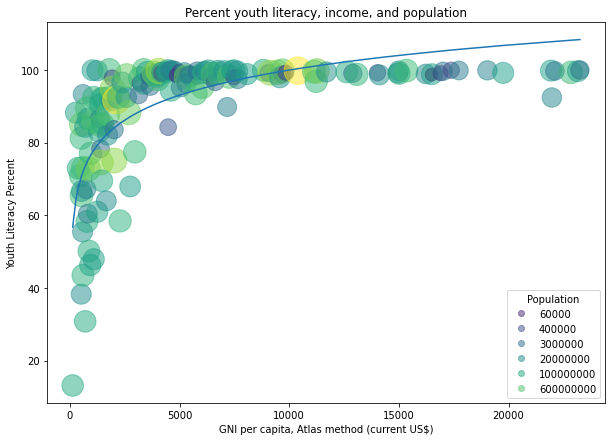

In [24]:
#Scatter plot with equation outliers removed
df_filtered = df_filtered.sort_values('gnp')
c = np.log10(df_filtered['population']).to_numpy()
key = [round(round(10**(n/10),-int(np.floor(np.log10(abs(10**(n/10))))))) for n in range(48,92,8)]

plt.rcParams["figure.figsize"] = (10,7)
scatter = plt.scatter(df_filtered['gnp'],df_filtered['youth_literacy'], s=(3*c)**2, c=c/10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=key,loc="lower right", title="Population")
plt.title('Percent youth literacy, income, and population')
plt.xlabel('GNI per capita, Atlas method (current US$)')
plt.ylabel('Youth Literacy Percent')
plt.plot(df_filtered['gnp'], 9.94755686025289 * np.log(df_filtered['gnp']) + 8.314456520728868)
plt.show();

We can see that of the models tested, the best model had a test score of 0.48. There is clearly a relationship between income and youth literacy but more variables could be investigated to help improve the model.

## Summary

In this notebook, we saw the change in youth literacy rates since 2000. The rate has been increasing for all country income groups. We also saw which countries have the lowest youth literacy rates. Finally, we looked at the relationship between youth literacy and GNI per capita and saw that the counties with the lowest literacy rates had lower incomes.